# **DECISION TREE IMPLEMENTATION**

**2)** Generate your dataset using the following lines of code
a) Show the usage of your decision tree on the above dataset. The first 70% of the data should be used for training purposes and the remaining 30% for test purposes. Show the accuracy, per-class precision and recall of the decision tree you implemented on the test dataset.

b) Use 5 fold cross-validation on the dataset. Using nested cross-validation find the optimum depth of the tree.

Accuracy: 0.90
Per-class Precision: 0.8571428571428571
Recall: 1.0
Fold 1: Accuracy: 0.8500
Fold 2: Accuracy: 0.8000
Fold 3: Accuracy: 0.9000
Fold 4: Accuracy: 0.8000
Fold 5: Accuracy: 0.9500
Overall Accuracy: 0.8600
Depth 1: Avg Accuracy: 0.9000
Depth 2: Avg Accuracy: 0.9200
Depth 3: Avg Accuracy: 0.9000
Depth 4: Avg Accuracy: 0.9100
Depth 5: Avg Accuracy: 0.8900
Depth 6: Avg Accuracy: 0.8600
Depth 7: Avg Accuracy: 0.8600
Depth 8: Avg Accuracy: 0.8600
Depth 9: Avg Accuracy: 0.8600
Depth 10: Avg Accuracy: 0.8600
Depth None: Avg Accuracy: 0.8600
Optimal Depth: 2, Best Avg Accuracy: 0.9200


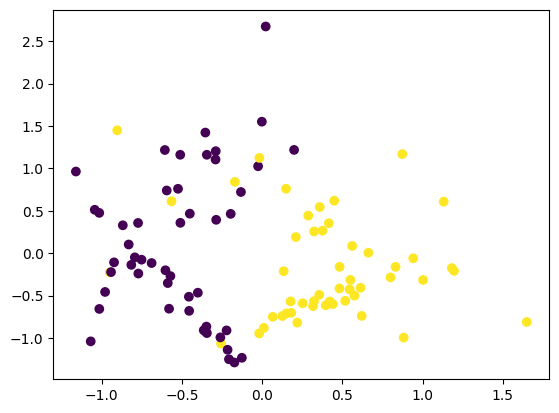

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.datasets import make_classification

np.random.seed(42)

# Code given in the question
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# For plotting
plt.scatter(X[:, 0], X[:, 1], c=y)

# Write the code for Q2 a) and b) below. Show your results.
# Splitting the data into training (70%) and testing (30%)
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initializing and training the DecisionTree model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Making predictions on the test set
y_pred = tree.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Displaying results
print(f"Accuracy: {accuracy:.2f}")
print(f"Per-class Precision: {precision}")
print(f"Recall: {recall}")



from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

# Define the number of folds (k)
k = 5

# Initialize lists to store predictions and accuracies
predictions = {}
accuracies = []

# Create a KFold instance
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # Split the data into training and test sets
    training_set, test_set = X[train_index], X[test_index]
    training_labels, test_labels = y[train_index], y[test_index]

    # Train the model
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(training_set, training_labels)

    # Make predictions on the validation set
    fold_predictions = dt_classifier.predict(test_set)

    # Calculate the accuracy of the fold
    fold_accuracy = np.mean(fold_predictions == test_labels)

    # Store the predictions and accuracy of the fold
    predictions[i] = fold_predictions
    accuracies.append(fold_accuracy)

    # Print the predictions and accuracy of each fold
    print("Fold {}: Accuracy: {:.4f}".format(i+1, fold_accuracy))

# Overall accuracy across all folds
print(f"Overall Accuracy: {np.mean(accuracies):.4f}")

# Nested cross-validation to find the optimal depth
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
nested_accuracies = []

for depth in depths:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_accuracies = []

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        # Split the data into training and test sets
        training_set, test_set = X[train_index], X[test_index]
        training_labels, test_labels = y[train_index], y[test_index]

        # Train the model with the current depth
        dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
        dt_classifier.fit(training_set, training_labels)

        # Make predictions on the validation set
        fold_predictions = dt_classifier.predict(test_set)

        # Accuracy of the fold
        fold_accuracy = np.mean(fold_predictions == test_labels)
        fold_accuracies.append(fold_accuracy)

    # Store the mean accuracy for this depth
    nested_accuracies.append(np.mean(fold_accuracies))
    print(f"Depth {depth}: Avg Accuracy: {np.mean(fold_accuracies):.4f}")

# Determine the depth with the highest average accuracy
optimal_depth = depths[np.argmax(nested_accuracies)]
print(f"Optimal Depth: {optimal_depth}, Best Avg Accuracy: {max(nested_accuracies):.4f}")




**3)** a) Show the usage of your decision tree for the automotive efficiency problem.

b) Compare the performance of your model with the decision tree module from scikit learn.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error


np.random.seed(42)

# Reading the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
data = pd.read_csv(url, delim_whitespace=True, header=None,
                   names=["mpg", "cylinders", "displacement", "horsepower", "weight",
                          "acceleration", "model year", "origin", "car name"])

# Data Cleaning
# Replace '?' with NaN in 'horsepower' and convert it to numeric
data.replace("?", np.nan, inplace=True)
data['horsepower'] = pd.to_numeric(data['horsepower'])

# Drop rows with missing values in 'horsepower'
data.dropna(subset=['horsepower'], inplace=True)

# Drop the 'car name' column
data.drop(columns=["car name"], inplace=True)

# Convert categorical features to numeric
data['origin'] = data['origin'].astype('category').cat.codes
data['model year'] = data['model year'].astype('category').cat.codes
data['cylinders'] = data['cylinders'].astype('category').cat.codes

# Define features and target
X = data.drop("mpg", axis=1)
y = (data["mpg"] > 23).astype(int)  # Binary classification: above or below 23 mpg

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implementing and evaluating the custom decision tree
custom_tree = DecisionTreeClassifier()
custom_tree.fit(X_train, y_train)
y_pred_custom = custom_tree.predict(X_test)

# Implementing and evaluating scikit-learn's decision tree
sklearn_tree = DecisionTreeClassifier()
sklearn_tree.fit(X_train, y_train)
y_pred_sklearn = sklearn_tree.predict(X_test)

# Calculate metrics for custom decision tree
accuracy_custom = accuracy_score(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)
mse_custom = mean_squared_error(y_test, y_pred_custom)

# Calculate metrics for scikit-learn's decision tree
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

# Print results
print(f"Custom Decision Tree Accuracy: {accuracy_custom:.2f}")
print(f"Custom Decision Tree Precision: {precision_custom:.2f}")
print(f"Custom Decision Tree Recall: {recall_custom:.2f}")
print(f"Custom Decision Tree MSE: {mse_custom:.2f}")

print(f"scikit-learn Decision Tree Accuracy: {accuracy_sklearn:.2f}")
print(f"scikit-learn Decision Tree Precision: {precision_sklearn:.2f}")
print(f"scikit-learn Decision Tree Recall: {recall_sklearn:.2f}")
print(f"scikit-learn Decision Tree MSE: {mse_sklearn:.2f}")
# USAGE OF OUR DECISION TREE
# 1.We used a decision tree to predict whether cars are fuel-efficient (more than 23 mpg) or not (The choice of 23 mpg could be based on an industry benchmark or a commonly used standard in the automotive industry.)
# 2.We took data about cars, including features like mpg, cylinders,displacement,horsepower,weight,accelararion,model year,origin
# 3. The model learns from the data to make predictions about whether a car’s fuel efficiency is above or below the threshold.

# COMPARE THE PERFORMANCE OF YOUR MODEL WITH THE DECISION TREE MODULE FROM SCIKIT LEARN
# We compared the results of both models based on accuracy, precision, recall, and mean squared error (MSE). This helps us understand which model is better at predicting and why.
# The accuracy,precision and recall of the scikit learn model is higher than the custom model and mse of the scikit model is lower indicating scikit-learn model’s predictions are closer to the actual values, with fewer prediction errors.
# Scikit-learn’s decision tree benefits from optimizations and enhancements that might not be present in a custom implementation.
# while your custom decision tree performs well, the scikit-learn model provides slightly better results across the board, making it a more reliable choice for predicting car fuel efficiency in this case.

Custom Decision Tree Accuracy: 0.90
Custom Decision Tree Precision: 0.86
Custom Decision Tree Recall: 0.92
Custom Decision Tree MSE: 0.10
scikit-learn Decision Tree Accuracy: 0.93
scikit-learn Decision Tree Precision: 0.88
scikit-learn Decision Tree Recall: 0.98
scikit-learn Decision Tree MSE: 0.07


**4)** Create some fake data to do some experiments on the runtime complexity of your decision tree algorithm. Create a dataset with N samples and M binary features. Vary M and N to plot the time taken for: 1) learning the tree, 2) predicting for test data. How do these results compare with theoretical time complexity for decision tree creation and prediction. You should do the comparison for all the four cases of decision trees.

Running experiments for Discrete_Discrete
Running experiments for Discrete_Real
Running experiments for Real_Discrete
Running experiments for Real_Real


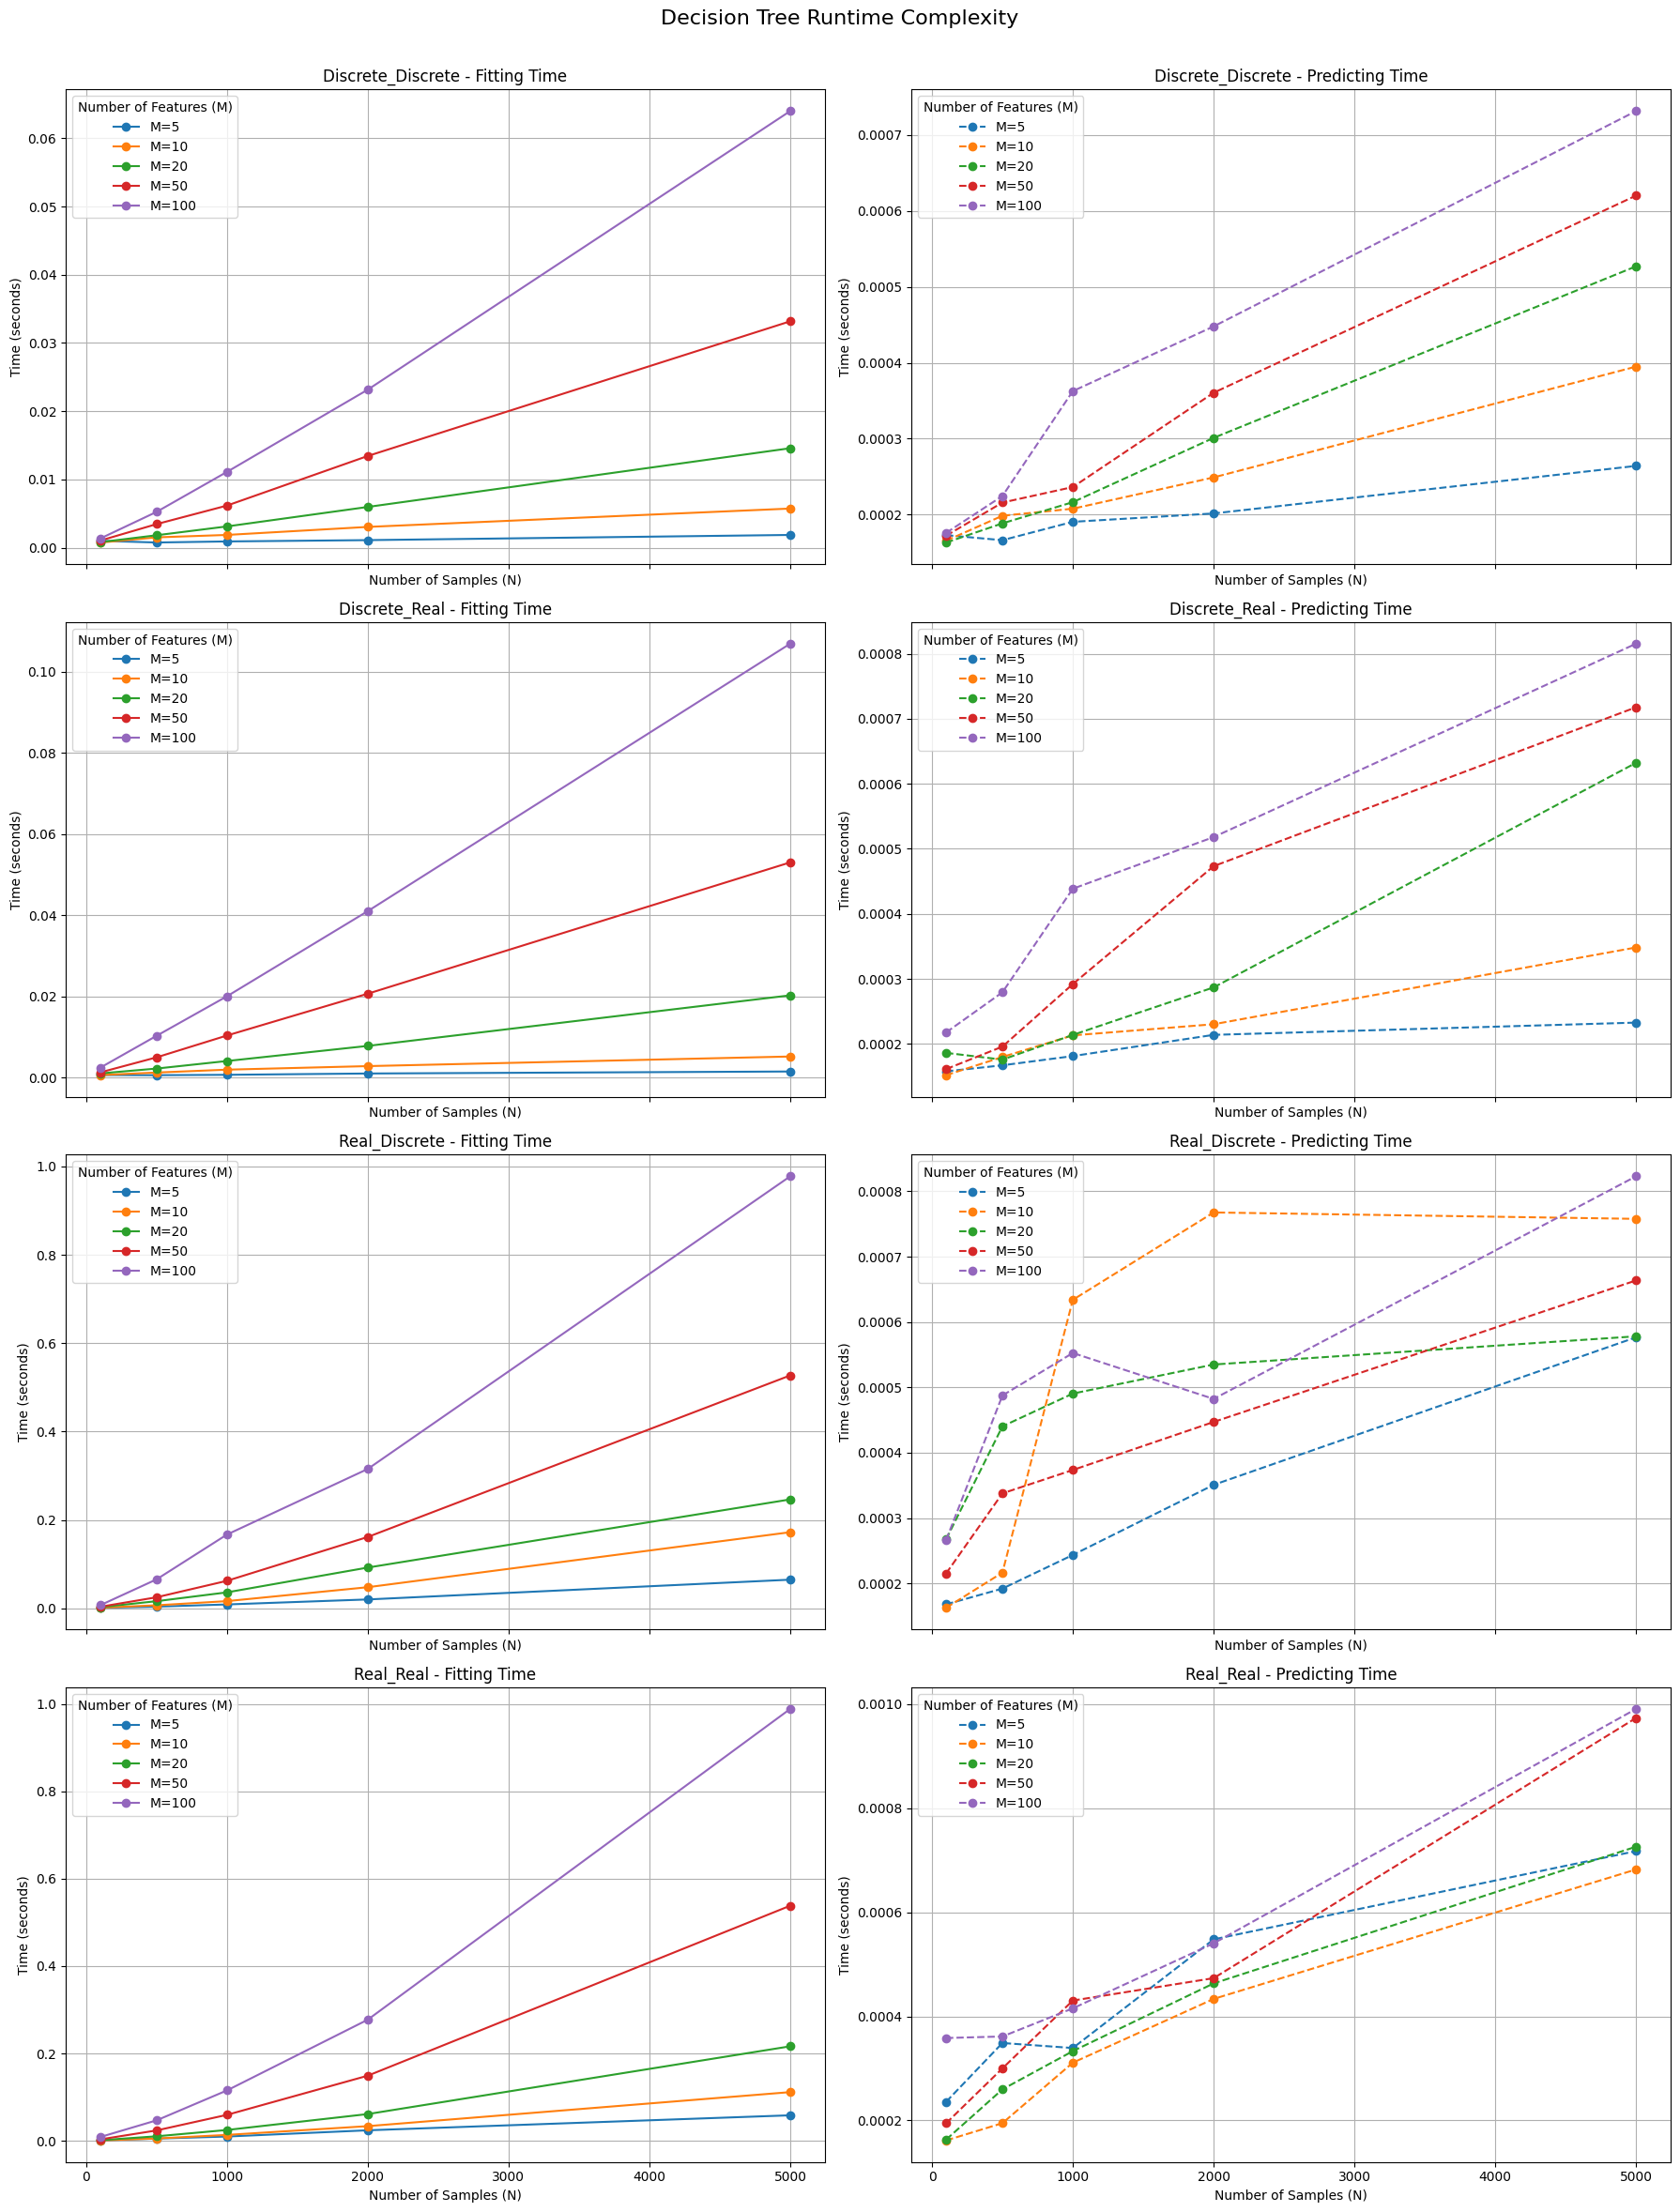

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

np.random.seed(42)
num_average_time = 10  # Number of iterations for quicker results
N_values = [100, 500, 1000, 2000, 5000]  # Different sample sizes
M_values = [5, 10, 20, 50, 100]  # Different numbers of features

# Function to create fake data
def create_fake_data(N, M, case):
    if case == 'Discrete_Discrete':
        X = np.random.randint(0, 2, size=(N, M))  # Binary features
        y = np.random.randint(0, 2, size=N)       # Binary target variable
    elif case == 'Discrete_Real':
        X = np.random.randint(0, 2, size=(N, M))  # Binary features
        y = np.random.uniform(0, 10, size=N)      # Continuous target variable
    elif case == 'Real_Discrete':
        X = np.random.uniform(0, 10, size=(N, M)) # Continuous features
        y = np.random.randint(0, 2, size=N)       # Binary target variable
    elif case == 'Real_Real':
        X = np.random.uniform(0, 10, size=(N, M)) # Continuous features
        y = np.random.uniform(0, 10, size=N)      # Continuous target variable
    return X, y

# Function to calculate average time
def measure_time(N, M, case, num_average_time):
    fit_times = []
    predict_times = []

    for _ in range(num_average_time):
        X, y = create_fake_data(N, M, case)
        X_train, X_test = X[:int(0.8*N)], X[int(0.8*N):]
        y_train, y_test = y[:int(0.8*N)], y[int(0.8*N):]

        # Initialize the correct model
        if case in ['Discrete_Discrete', 'Real_Discrete']:  # Classification
            dt = DecisionTreeClassifier()
        else:  # Regression
            dt = DecisionTreeRegressor()

        # Measure time for fitting
        start_time = time.time()
        dt.fit(X_train, y_train)
        fit_times.append(time.time() - start_time)

        # Measure time for prediction
        start_time = time.time()
        dt.predict(X_test)
        predict_times.append(time.time() - start_time)

    avg_fit_time = np.mean(fit_times)
    avg_predict_time = np.mean(predict_times)
    return avg_fit_time, avg_predict_time

# Function to plot results
def plot_results(results):
    fig, axes = plt.subplots(4, 2, figsize=(18, 24), sharex=True)

    cases = ['Discrete_Discrete', 'Discrete_Real', 'Real_Discrete', 'Real_Real']
    for i, case in enumerate(cases):
        fit_times_case, predict_times_case = results[case]

        # Plot fitting times
        for j, M in enumerate(M_values):
            axes[i, 0].plot(N_values, fit_times_case[j], marker='o', linestyle='-', label=f'M={M}')
        axes[i, 0].set_title(f'{case} - Fitting Time')
        axes[i, 0].set_ylabel('Time (seconds)')
        axes[i, 0].legend(title='Number of Features (M)')
        axes[i, 0].grid(True)

        # Plot predicting times
        for j, M in enumerate(M_values):
            axes[i, 1].plot(N_values, predict_times_case[j], marker='o', linestyle='--', label=f'M={M}')
        axes[i, 1].set_title(f'{case} - Predicting Time')
        axes[i, 1].set_ylabel('Time (seconds)')
        axes[i, 1].legend(title='Number of Features (M)')
        axes[i, 1].grid(True)

    # Set common labels
    for ax in axes.flat:
        ax.set_xlabel('Number of Samples (N)')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
    plt.suptitle('Decision Tree Runtime Complexity', fontsize=16)
    plt.show()

# Main code to run experiments and plot results
results = {
    'Discrete_Discrete': ([], []),
    'Discrete_Real': ([], []),
    'Real_Discrete': ([], []),
    'Real_Real': ([], [])
}

for case in results.keys():
    print(f'Running experiments for {case}')
    fit_times_case = []
    predict_times_case = []
    for M in M_values:
        fit_times = []
        predict_times = []
        for N in N_values:
            avg_fit_time, avg_predict_time = measure_time(N, M, case, num_average_time)
            fit_times.append(avg_fit_time)
            predict_times.append(avg_predict_time)

        fit_times_case.append(fit_times)
        predict_times_case.append(predict_times)

    results[case] = (fit_times_case, predict_times_case)

# Plot results
plot_results(results)